##Load Dataset

In [4]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Load the dataset
diabetes = pd.read_csv('diabetes.csv')

# Display dataset overview
print(diabetes.head())
print(diabetes.tail())
print(diabetes.info())
print(diabetes.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

#Data Preprocessing

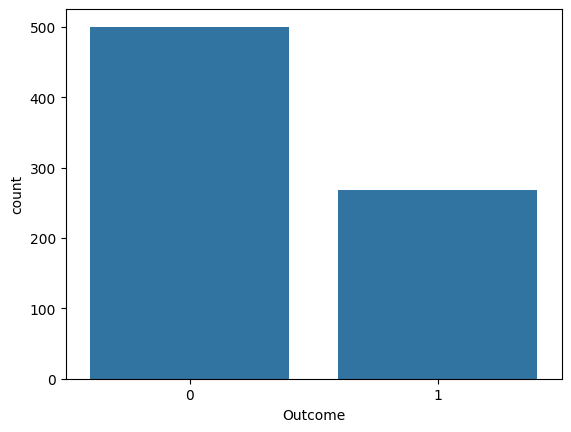

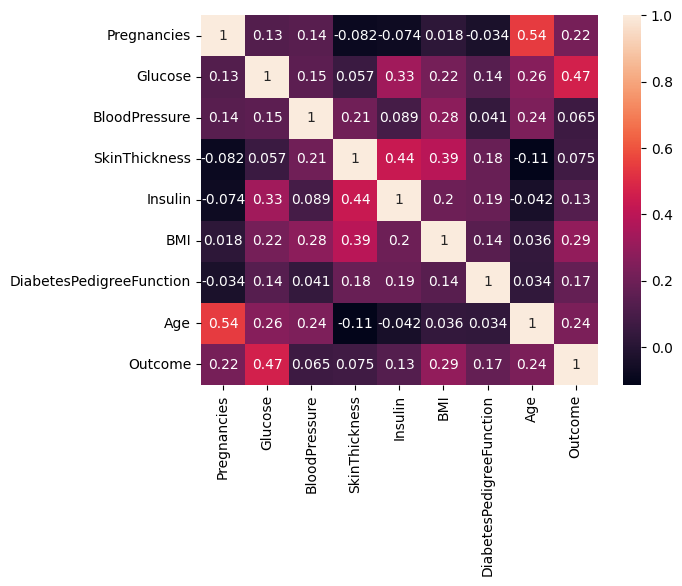

In [5]:
# Visualizing the class distribution (Outcome)
sns.countplot(x='Outcome', data=diabetes)
plt.show()

# Correlation heatmap
sns.heatmap(diabetes.corr(), annot=True)
plt.show()

# Splitting dataset into features (X) and labels (y)
X = diabetes.iloc[:, 0:8].values  # Features (columns 0 to 7)
y = diabetes.iloc[:, 8].values    # Labels (Outcome column)

# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Build and Train the Deep Learning Model

In [6]:
# Building the Sequential Neural Network
classifier = tf.keras.models.Sequential()

# Input layer and first hidden layer with dropout
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8,)))
classifier.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer with dropout
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

# Output layer (binary classification)
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Model summary
classifier.summary()

# Compile the model
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs_hist = classifier.fit(X_train, y_train, epochs=20, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,401 (642.19 KB)

 Trainable params: 164,401 (642.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6392 - loss: 0.6018
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7671 - loss: 0.4590
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7640 - loss: 0.4784
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7783 - loss: 0.4641
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7565 - loss: 0.4841
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7815 - loss: 0.4563
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7783 - loss: 0.4332
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7811 - loss: 0.4335
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7930 - loss: 0.4379
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8204 - loss: 0.3740
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8059 - loss: 0.4103
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7997 - lo

#Evaluate the Model

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training Confusion Matrix


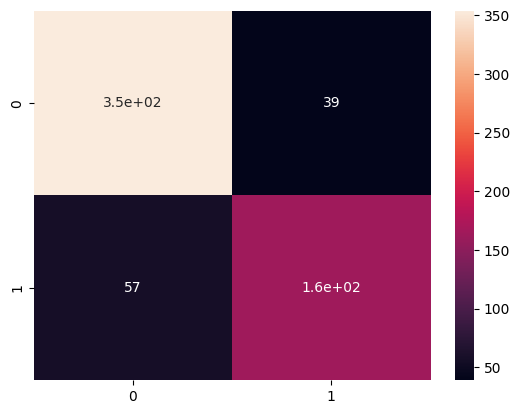

Training Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       393
           1       0.81      0.74      0.77       221

    accuracy                           0.84       614
   macro avg       0.83      0.82      0.83       614
weighted avg       0.84      0.84      0.84       614

Testing Confusion Matrix


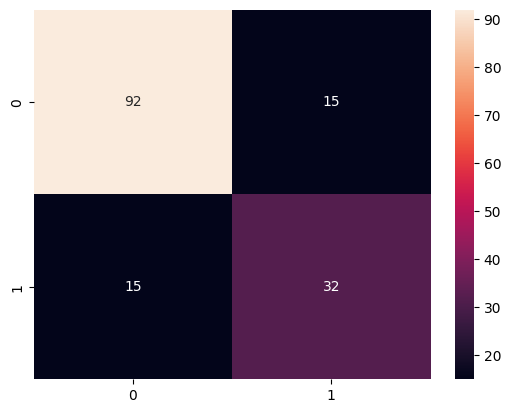

Testing Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



In [7]:
# Predict on test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Training performance: Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

# Confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix")
sns.heatmap(cm_train, annot=True)
plt.show()

# Classification report for training set
print("Training Classification Report")
print(classification_report(y_train, y_train_pred))

# Testing performance: Confusion matrix and classification report
cm_test = confusion_matrix(y_test, y_pred)
print("Testing Confusion Matrix")
sns.heatmap(cm_test, annot=True)
plt.show()

# Classification report for test set
print("Testing Classification Report")
print(classification_report(y_test, y_pred))

##Visualizing Training History

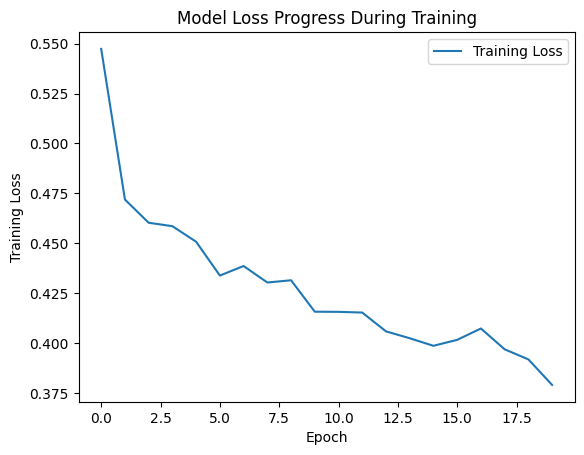

In [8]:
# Plot the training loss progress over epochs
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

##Visualizing Confusion Matrix

Confusion Matrix for Testing Set


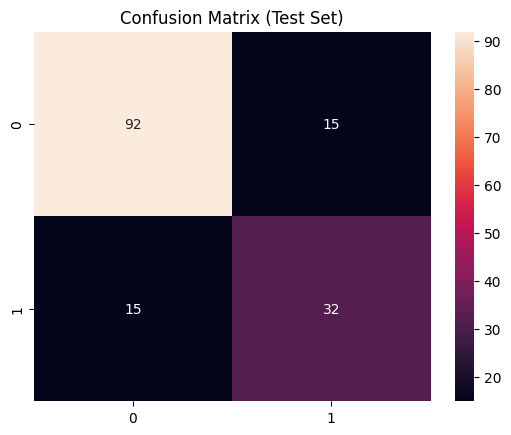

In [9]:
# Visualizing Confusion Matrix for the testing set
print("Confusion Matrix for Testing Set")
sns.heatmap(cm_test, annot=True, fmt='g')
plt.title('Confusion Matrix (Test Set)')
plt.show()
